# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.389686e+01     1.446950e+01
 * time: 0.002953052520751953
     1     6.281141e+01     9.630385e+00
 * time: 0.008555889129638672
     2     5.632342e+01     1.077170e+01
 * time: 0.02173900604248047
     3     4.059382e+01     9.212709e+00
 * time: 0.039794921875
     4     2.997556e+01     8.530064e+00
 * time: 0.05828499794006348
     5     2.401390e+01     6.770026e+00
 * time: 0.1380159854888916
     6     1.080719e+01     1.859589e+00
 * time: 0.1537010669708252
     7     8.211930e+00     2.468913e+00
 * time: 0.16728806495666504
     8     7.060959e+00     1.902298e+00
 * time: 0.18068408966064453
     9     6.719761e+00     1.325448e+00
 * time: 0.19474387168884277
    10     6.570397e+00     3.294741e+00
 * time: 0.2068469524383545
    11     6.271279e+00     1.416550e+00
 * time: 0.22116804122924805
    12     6.167394e+00     1.830257e+00
 * time: 0.23245596885681152
    13     6.066788e+00     1.933445e+00
 * time: 0.242

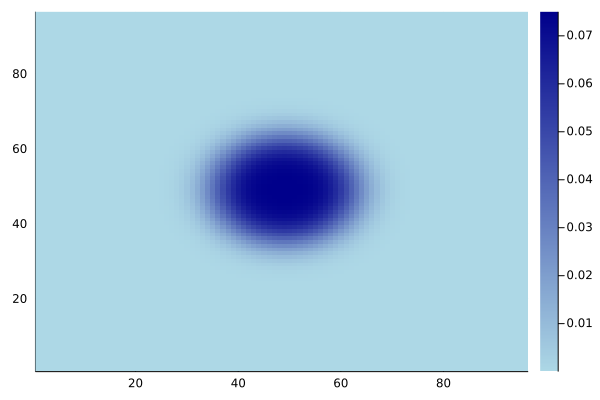

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))